<a href="https://colab.research.google.com/github/llamington/COSC121/blob/master/EMTH211_Assignment_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMTH211 Assignment One

##Initialisation

This report is scripted in Python and utilises the NumPy module for matrix operations, and the SciPy module for interpreting MATLAB matrices.

In [ ]:
# import required modules
import numpy as np
import sympy as sp
from scipy.io import loadmat
%matplotlib inline 
from matplotlib import pyplot as plt

sp.init_printing()  # initialise LaTeX printing
matlab_file = loadmat('A1.mat')  # load MATLAB file

##Question One

###Part A

The roading network can be modelled using a Markov Chain with Transistion Probability Matrix shown below, 
constructed based on the graph given in the assignment. Each row, from A-G represents the probability of the traffic camera landing on the intersection the following day given the current days' intersection (column)

In [ ]:
t_p_mat = np.array([
    [1/3, 2/9, 0, 0, 0, 0, 0],
    [2/3, 1/9, 2/5, 2/9, 0, 0, 2/7],
    [0, 2/9, 1/5, 2/9, 0, 0, 0],
    [0, 2/9, 2/5, 1/9, 2/5, 0, 2/7],
    [0, 0, 0, 2/9, 1/5, 2/5, 0],
    [0, 0, 0, 0, 2/5, 1/5, 2/7],
    [0, 2/9, 0, 2/9, 0, 2/5, 1/7]])
sp.Matrix(t_p_mat)

⎡0.333333333333333  0.222222222222222  0.0         0.0         0.0  0.0       
⎢                                                                             
⎢0.666666666666667  0.111111111111111  0.4  0.222222222222222  0.0  0.0  0.285
⎢                                                                             
⎢       0.0         0.222222222222222  0.2  0.222222222222222  0.0  0.0       
⎢                                                                             
⎢       0.0         0.222222222222222  0.4  0.111111111111111  0.4  0.0  0.285
⎢                                                                             
⎢       0.0                0.0         0.0  0.222222222222222  0.2  0.4       
⎢                                                                             
⎢       0.0                0.0         0.0         0.0         0.4  0.2  0.285
⎢                                                                             
⎣       0.0         0.222222222222222  0.0  0.222222

The long-term state of the system is determined by the eigenvector corresponding to the dominant eigenvalue of the Transisiton Probability Matrix. This Eigenvalue is 1. Dividing the corresponding vector with its 1-norm gives the probability that the camera will be at each of the intersections. The normalised eigenvector is shown below:


In [ ]:
eigs, eig_v = np.linalg.eig(t_p_mat)
long_term = abs(eig_v[:, 0])/np.linalg.norm(eig_v[:, 0], 1)
sp.Matrix(long_term)

⎡0.069767441860465⎤
⎢                 ⎥
⎢0.209302325581396⎥
⎢                 ⎥
⎢0.116279069767442⎥
⎢                 ⎥
⎢0.209302325581395⎥
⎢                 ⎥
⎢0.116279069767442⎥
⎢                 ⎥
⎢0.116279069767442⎥
⎢                 ⎥
⎣0.162790697674419⎦

| Intersection | Probability of Camera being at Intersection |
|--------------|---------------------------------------------|
| A            |             0.070|
| B            |      0.209     |
| C            |         0.116              |
| D            |      0.209              |
| E            |      0.116           |
| F            |        0.116              |
| G            |           0.163                                 |

###Part B

The probability of the camera being positioned at each particular intersection two days in a row, is equal to the probability that the camera is there in the first place, multiplied by the probability that it will stay there. It is already known that the long term state vector contains the probability of the camera being at each intersection. The probability that the camera will stay there is contained in the diagonal entries of the original transition probability matrix, A. Multiplying element wise, gives:

In [ ]:
two_consec_days = (long_term * t_p_mat.diagonal())
two_consec_days /= np.linalg.norm(two_consec_days, 1)
sp.Matrix(two_consec_days)

⎡0.142857142857143⎤
⎢                 ⎥
⎢0.142857142857143⎥
⎢                 ⎥
⎢0.142857142857143⎥
⎢                 ⎥
⎢0.142857142857143⎥
⎢                 ⎥
⎢0.142857142857143⎥
⎢                 ⎥
⎢0.142857142857143⎥
⎢                 ⎥
⎣0.142857142857143⎦

Each intersection is equally likely, with a probability of 1/7<sup>th</sup>, to have a camera placed there for two consecutive days in a row. 				



##Question Two

A matrix is formed consisting of the *x, y, z* measurements of the edge of the circle:

\begin{equation}
\begin{bmatrix}
2x_0^* & 2y_0^* & 2z_0^* & 1 \\ 
\vdots & \vdots & \vdots & \vdots \\ 
2x_n^* & 2y_n^* & 2z_n^* & 1
\end{bmatrix}
\begin{bmatrix}
 x_0 \\ 
 y_0 \\ 
 z_0 \\
 k
\end{bmatrix}
=
\begin{bmatrix}
(x_0^*)^2 + (y_0^*)^2 + (z_0^*)^2 \\
\vdots \\
(x_n^*)^2 + (y_n^*)^2 + (z_n^*)^2
\end{bmatrix}
\end{equation}

where *k* is defined by the equation:

\begin{equation}
    k=r^2-x_0^2 -y_0^2-z_0^2
\end{equation}

This can be simplified to:

\begin{equation}
A\vec{x} = \vec{y}
\end{equation}

This system is overdetermined and inconsistent, as the measurements contain error. No solutions exist for which *Ax = y. y* is clearly not in the column space of *A*. Despite this, it is possible to estimate a solution to the system of equations. Such an approximation should minimize the difference between *y* and the estimated solution, *A*.
Minimizing 
\begin{equation}
\left \| y-Ax  \right \|_2=(y_1-Ax_2)^2+(y_2-Ax_2)^2+\cdots+(y_n-Ax_n)^2
\end{equation}

gives the least squares approximation, *x*. In order to minimize the squared residuals,  one should multiply both sides of the orginial system of equations by A transpose, and solve the new system of equations. 

\begin{equation}
A^TA\vec{x} = A^T\vec{y}
\end{equation}

Multiplying both sides by (*A<sup>T</sup>A*)<sup>-1</sup> gives the vector *x*:

\begin{equation}
\vec{x} = (A^TA)^{-1}A^T\vec{y}
\end{equation}

In [ ]:
measurements_mat = np.array(matlab_file['X']).T
ls_mat_a = measurements_mat * 2
ones_col = np.ones((ls_mat_a.shape[0], 1))
ls_mat_a = np.append(ls_mat_a, ones_col, axis=1)
ls_vec_y = np.sum(np.array(measurements_mat**2), axis=1)
ls_mat_a_trans_a = ls_mat_a.T @ ls_mat_a
ls_vec_a_trans_y = ls_mat_a.T @ ls_vec_y
ls_vec_x = np.linalg.solve(ls_mat_a_trans_a, ls_vec_a_trans_y)
sp.Matrix(ls_vec_x)

⎡0.508107370440936 ⎤
⎢                  ⎥
⎢ 1.35415879402521 ⎥
⎢                  ⎥
⎢-0.196298270252113⎥
⎢                  ⎥
⎣ 3.63763530935268 ⎦

The *x, y, z* center values of (0.508, 1.354, -0.196) can be substituted into the equation for *k*, giving the radius of the sphere:

In [ ]:
radius = (ls_vec_x[3] + (ls_vec_x[:3]**2).sum())**0.5
radius

##Question Three

The image matrix is loaded in greyscale:

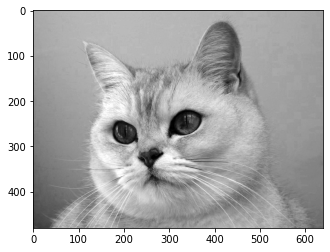

In [ ]:
image = matlab_file['A']
plt.imshow(image, cmap='gray')
plt.show()

###Part A

The singular values, left and right singular vectors are computed. The largest and smallest singular values are displayed:

In [ ]:
left_vectors, singular_values, right_vectors = np.linalg.svd(image, full_matrices=False)
largest_sv = singular_values.max()
smallest_sv = singular_values.min()
largest_sv, smallest_sv

###Part B

The largest *n* singular values are selected from the singular values array, which are plotted below. The rest of the singular values are set to zero.

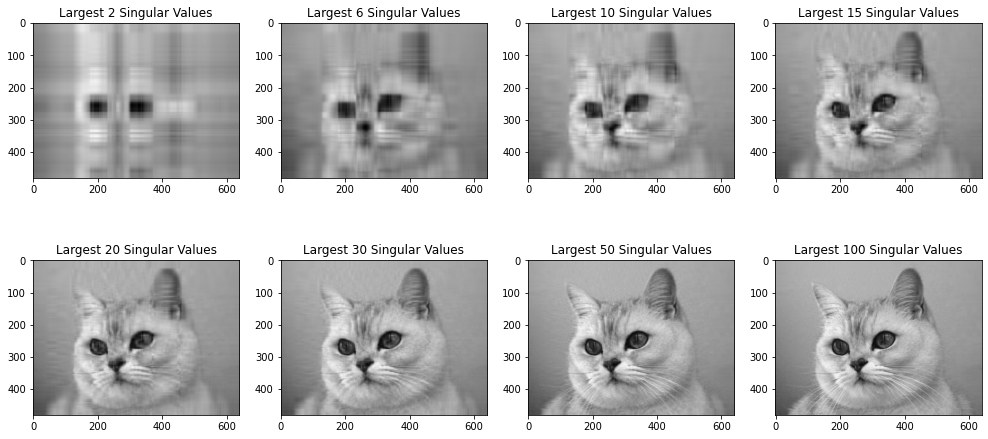

In [ ]:
reduced_svs_i = np.array([2, 6, 10, 15, 20, 30, 50, 100])
fig, ax = plt.subplots(2, 4, figsize=(17, 8))
for num, sv_i in enumerate(reduced_svs_i):
    reduced_svs = np.zeros(singular_values.size)
    reduced_svs[:sv_i] = singular_values[:sv_i]
    reduced_image = np.dot(left_vectors*reduced_svs, right_vectors)
    ax[num // 4, num % 4].imshow(reduced_image, cmap='gray')
    ax[num // 4, num % 4].set_title(f'Largest {sv_i} Singular Values')

plt.show()

###Part C

The amount of bytes required to store an uncompressed *m* × *n* image is
\begin{equation}
    m \times n
\end{equation}
Whereas the number of bytes required to store the same image in an SVD is
\begin{equation}
    k(m+n)
\end{equation}
for the *k* largest singular values.<br>
For the 480×640 grayscale image, 307200 bytes are taken up, whereas the SVD image requires 1120*k* bytes. Expressing this as a percentage gives
\begin{equation} 
    S_\% = 0.365k
\end{equation} 

###Part D

The formulas derived in part (c) can be used to calculate the storage required to store for each image in part (b). The results, displayed below, show that images can be significantly compressed while still containing essential detail. For example, the image using the largest 50 singular values does not appear fuzzy to the human eye, yet only requires 18.25% storage that the original file demands. 

In [ ]:
for num_svs in reduced_svs_i:
    print(f'{num_svs} Singular Values require {0.365 * num_svs:.2f}% of the original file size')

2 Singular Values require 0.73% of the original file size
6 Singular Values require 2.19% of the original file size
10 Singular Values require 3.65% of the original file size
15 Singular Values require 5.47% of the original file size
20 Singular Values require 7.30% of the original file size
30 Singular Values require 10.95% of the original file size
50 Singular Values require 18.25% of the original file size
100 Singular Values require 36.50% of the original file size
